In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Deep learning/telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
#To drop unwanted features from given dataset
df.drop(['AccountWeeks','DataUsage','DayCalls','DayMins'],axis=1,inplace=True)

In [5]:
df.head()

,Churn,ContractRenewal,DataPlan,CustServCalls,MonthlyCharge,OverageFee,RoamMins
0,0,1,1,1,89.0,9.87,10.0
1,0,1,1,1,82.0,9.78,13.7
2,0,1,0,0,52.0,6.06,12.2
3,0,0,0,2,57.0,3.10,6.6
4,0,0,0,3,41.0,7.42,10.1


In [6]:
#To check null values
df.isnull().sum()

Churn              0
ContractRenewal    0
DataPlan           0
CustServCalls      0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
df.dtypes

Churn                int64
ContractRenewal      int64
DataPlan             int64
CustServCalls        int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [8]:
#Select input and output from given dataset
X=df.drop('Churn',axis=1)#input
Y=df['Churn'] #Output

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
X_train.shape ,X_test.shape

((2333, 6), (1000, 6))

In [11]:
Y_train.shape,X_test.shape

((2333,), (1000, 6))

In [12]:
#Apply RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
#Create object of RandomOverSampler class
ros=RandomOverSampler()
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [13]:
Y_train1.value_counts()

0    1995
1    1995
Name: Churn, dtype: int64

In [14]:
Y_test1.value_counts()

0    855
1    855
Name: Churn, dtype: int64

In [15]:
#Apply StandardScaler on Input X_train, X_test
from sklearn.preprocessing import StandardScaler
#create object of standardscaler
ss=StandardScaler()
X_train1=ss.fit_transform(X_train1)
X_test1=ss.transform(X_test1)

In [16]:
#create a neural network
from tensorflow.keras.layers import Dropout
#create object of Sequential class
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=7,activation='relu',
                          input_shape=(X.shape[1],)),Dropout(0.20),#1st hidden layer
    tf.keras.layers.Dense(units=6,activation='relu'),Dropout(0.20), #2nd hidden layer      
    tf.keras.layers.Dense(units=1,activation='sigmoid')#output Layer
])

In [17]:
#to show summery of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 49        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 48        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#Create a EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
#create object of EarlyStopping class
es=EarlyStopping(monitor='val_loss',#val_loss means testing loss
min_delta=0.0001, #value of lambda
patience=20,
verbose=1,
mode='auto',
baseline=None,
restore_best_weights=False,
)

In [20]:
#Train the model with 70% data and also check validation
trained_model=model.fit(X_train1,Y_train1,epochs=5000,callbacks=es,
                        batch_size=32,validation_data=(X_test1,Y_test1))


Epoch 1/5000
125/125 [==============================] - 2s 6ms/step - loss: 0.7390 - accuracy: 0.5193 - val_loss: 0.6613 - val_accuracy: 0.6515
Epoch 2/5000
125/125 [==============================] - 1s 4ms/step - loss: 0.6664 - accuracy: 0.5719 - val_loss: 0.6375 - val_accuracy: 0.6398
Epoch 3/5000
125/125 [==============================] - 1s 4ms/step - loss: 0.6330 - accuracy: 0.6150 - val_loss: 0.6142 - val_accuracy: 0.6719
Epoch 4/5000
125/125 [==============================] - 1s 4ms/step - loss: 0.6098 - accuracy: 0.6449 - val_loss: 0.5921 - val_accuracy: 0.6982
Epoch 5/5000
125/125 [==============================] - 1s 4ms/step - loss: 0.5954 - accuracy: 0.6654 - val_loss: 0.5769 - val_accuracy: 0.7164
Epoch 6/5000
125/125 [==============================] - 1s 4ms/step - loss: 0.5744 - accuracy: 0.7185 - val_loss: 0.5608 - val_accuracy: 0.7363
Epoch 7/5000
125/125 [==============================] - 1s 5ms/step - loss: 0.5538 - accuracy: 0.7343 - val_loss: 0.5424 - val_accuracy:

In [21]:
#Evaluation of training data
model.evaluate(X_train1,Y_train1)

125/125 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8845


[0.3405534625053406, 0.8844611644744873]

In [22]:
#Evaluation of testing data
model.evaluate(X_test1,Y_test1)

54/54 [==============================] - 0s 5ms/step - loss: 0.4049 - accuracy: 0.8485


[0.40489819645881653, 0.8485380411148071]

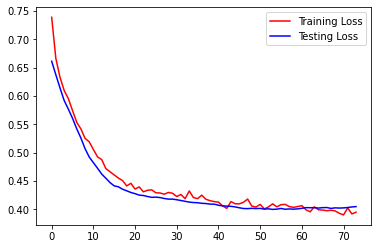

In [23]:
#visualisaton training loss and testing loss(val_loss)
plt.plot(trained_model.history['loss'],color='red',label='Training Loss')
plt.plot(trained_model.history['val_loss'],color='blue',label='Testing Loss')
plt.legend()
plt.show()

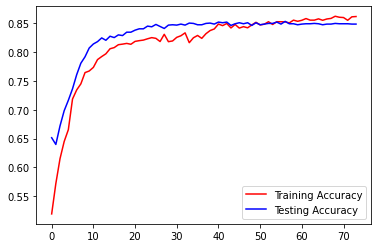

In [24]:
plt.plot(trained_model.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],color='blue',label='Testing Accuracy')
plt.legend()
plt.show()

In [25]:
Y_pred=model.predict(X_test1)

54/54 [==============================] - 0s 1ms/step


In [26]:
Y_pred

array([[0.18398824],
       [0.14749724],
       [0.1712923 ],
       ...,
       [0.9806025 ],
       [0.73209095],
       [0.8310615 ]], dtype=float32)

In [27]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [28]:
#Generate Report
from sklearn.metrics import classification_report
print(classification_report(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       855
           1       0.86      0.84      0.85       855

    accuracy                           0.85      1710
   macro avg       0.85      0.85      0.85      1710
weighted avg       0.85      0.85      0.85      1710



In [29]:
#confusion metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test1,Y_pred))

[[737 118]
 [141 714]]
